In [ ]:
import pandas as pd

In [ ]:
import os
import pandas as pd

folder_path = '/content/drive/MyDrive/fifa_years'
all_dataframes = []

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Read CSV into a dataframe and append to the array
        df = pd.read_csv(file_path)
        all_dataframes.append(df)

# Now all_dataframes contains all the dataframes from CSV files in the folder


In [ ]:
len(all_dataframes)


23

In [ ]:
merged_dataframe = pd.concat(all_dataframes, ignore_index=True)

In [ ]:
teams_list = merged_dataframe["Team"].to_list()

In [ ]:
teams_list = (list(set(teams_list)))

In [ ]:
df = merged_dataframe

def team_standing(team_name):
    # Filter the DataFrame for the specified team
    team_df = df[df['Team'] == team_name]

    # Calculate cumulative values
    team_games_played = team_df['Games Played'].astype(int).sum()
    team_win = team_df['Win'].astype(int).sum()
    team_draw = team_df['Draw'].astype(int).sum()
    team_loss = team_df['Loss'].astype(int).sum()
    team_goals_for = team_df['Goals For'].astype(int).sum()
    team_goals_against = team_df['Goals Against'].astype(int).sum()
    team_goal_difference = team_goals_for - team_goals_against
    team_points = team_df['Points'].astype(int).sum()

    win_percent = round((team_win / team_games_played) * 100, 2)
    draw_percent = round((team_draw / team_games_played) * 100, 2)
    loss_percent = round((team_loss / team_games_played) * 100, 2)

    total_games_played = df['Games Played'].sum()
    team_win_percent_total = round((team_win / total_games_played) * 100, 2)

    return (
        team_games_played,
        team_win,
        team_draw,
        team_loss,
        team_goals_for,
        team_goals_against,
        team_goal_difference,
        team_points,
        win_percent,
        draw_percent,
        loss_percent,
        team_win_percent_total
    )

# Example usage for Italy
italy_stats = team_standing("Italy")
print("Italy Team Standing:", italy_stats)


Italy Team Standing: (82, 44, 21, 17, 127, 77, 50, 123, 53.66, 25.61, 20.73, 2.28)


In [ ]:
Nigeria_stats = team_standing("Nigeria")
print("Nigeria Team Standing:", Nigeria_stats)

Nigeria Team Standing: (21, 6, 3, 12, 23, 30, -7, 21, 28.57, 14.29, 57.14, 0.31)


In [ ]:
import pandas as pd

# Assuming 'merged_dataframe' is your DataFrame
# Replace it with the actual name of your DataFrame

# Assuming 'team_standing' function is defined

# Create an empty list to store dictionaries for each team
team_data_list = []

# Iterate through unique team names in the original DataFrame
for team_name in merged_dataframe['Team'].unique():
    # Calculate cumulative values for each team
    team_stats = team_standing(team_name)

    # Create a dictionary for the team
    team_data = {
        'TeamName': team_name,
        'Games Played': team_stats[0],
        'Win': team_stats[1],
        'Win Percent': team_stats[8],  # Assuming win percent is at index 8
        'Draw': team_stats[2],
        'Draw Percent': team_stats[9],  # Assuming draw percent is at index 9
        'Loss': team_stats[3],
        'Loss Percent': team_stats[10],  # Assuming loss percent is at index 10
        'Goals For': team_stats[4],
        'Goals Against': team_stats[5],
        'Goal Difference': team_stats[6],
        'Points': team_stats[7],
        'Team Win Percent Total': team_stats[11]  # Assuming team win percent total is at index 11
    }

    # Append the dictionary to the list
    team_data_list.append(team_data)

# Create the new DataFrame using the list of dictionaries
new_df = pd.DataFrame(team_data_list)

# Set 'TeamName' as the index
new_df.set_index('TeamName', inplace=True)


<ipython-input-101-e4ed24993653>:17: RuntimeWarning: invalid value encountered in long_scalars
  win_percent = round((team_win / team_games_played) * 100, 2)
<ipython-input-101-e4ed24993653>:18: RuntimeWarning: invalid value encountered in long_scalars
  draw_percent = round((team_draw / team_games_played) * 100, 2)
<ipython-input-101-e4ed24993653>:19: RuntimeWarning: invalid value encountered in long_scalars
  loss_percent = round((team_loss / team_games_played) * 100, 2)


In [ ]:
new_df

,Games Played,Win,Win Percent,Draw,Draw Percent,Loss,Loss Percent,Goals For,Goals Against,Goal Difference,Points,Team Win Percent Total
TeamName,,,,,,,,,,,,
Italy,82,44,53.66,21,25.61,17,20.73,127,77,50,123,2.28
Czechoslovakia,30,11,36.67,5,16.67,14,46.67,44,45,-1,27,0.57
Germany,50,32,64.00,7,14.00,11,22.00,101,53,48,100,1.66
Austria,29,12,41.38,4,13.79,13,44.83,43,47,-4,28,0.62
Spain,66,31,46.97,16,24.24,19,28.79,108,74,34,96,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...
Serbia and Montenegro,3,0,0.00,0,0.00,3,100.00,2,10,-8,0,0.00
Slovakia,4,1,25.00,1,25.00,2,50.00,5,7,-2,4,0.05
New Zealand,6,0,0.00,3,50.00,3,50.00,4,14,-10,3,0.00


In [ ]:
sorteddf = new_df.sort_values(by="Games Played",ascending=False)

In [ ]:
df = sorteddf[["Games Played","Win","Draw","Loss"]]

In [ ]:
df = df.head(5)

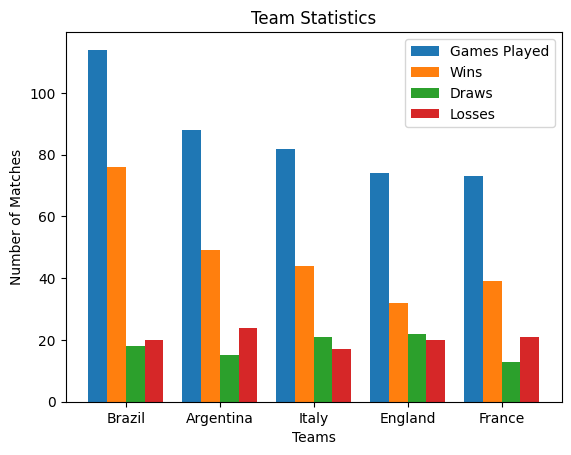

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
teams = df.index
games_played = df['Games Played']
wins = df['Win']
draws = df['Draw']
losses = df['Loss']

# Create a bar chart
bar_width = 0.2
index = range(len(teams))

plt.bar(index, games_played, width=bar_width, label='Games Played')
plt.bar([i + bar_width for i in index], wins, width=bar_width, label='Wins')
plt.bar([i + 2 * bar_width for i in index], draws, width=bar_width, label='Draws')
plt.bar([i + 3 * bar_width for i in index], losses, width=bar_width, label='Losses')

# Set labels and title
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.title('Team Statistics')
plt.xticks([i + 1.5 * bar_width for i in index], teams)

# Show legend
plt.legend()

# Display the plot
plt.show()

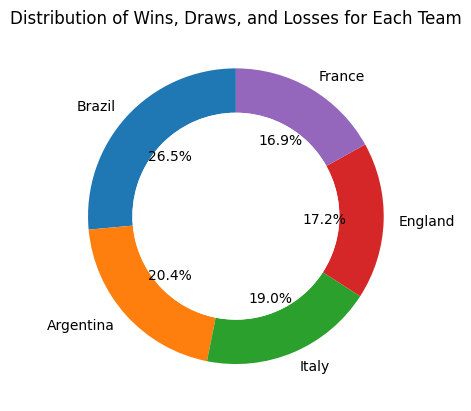

In [ ]:
teams = df.index
games_played = df['Games Played']
wins = df['Win']
draws = df['Draw']
losses = df['Loss']

# Calculate total matches for each team
total_matches = wins + draws + losses

# Calculate percentages for each category (wins, draws, losses)
win_percentage = wins / total_matches * 100
draw_percentage = draws / total_matches * 100
loss_percentage = losses / total_matches * 100

# Create a donut chart
fig, ax = plt.subplots()

# Draw the outer circle (pie chart)
ax.pie(total_matches, labels=teams, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw the inner circle (donut chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set title
plt.title('Distribution of Wins, Draws, and Losses for Each Team')

# Display the plot
plt.show()


In [ ]:
df = sorteddf[["Games Played","Win","Draw","Loss"]]
df


,Games Played,Win,Draw,Loss
TeamName,,,,
Brazil,114,76,18,20
Argentina,88,49,15,24
Italy,82,44,21,17
England,74,32,22,20
France,73,39,13,21
...,...,...,...,...
Haiti,3,0,0,3
Cuba,3,1,1,1
Kuwait,3,0,1,2


In [ ]:
df

,Games Played,Win,Draw,Loss
TeamName,,,,
Brazil,114,76,18,20
Argentina,88,49,15,24
Italy,82,44,21,17
England,74,32,22,20
France,73,39,13,21
...,...,...,...,...
Haiti,3,0,0,3
Cuba,3,1,1,1
Kuwait,3,0,1,2


In [ ]:
TopFive = new_df.sort_values(by='Team Win Percent Total',ascending=False).head(5)[['Games Played','Win','Win Percent','Draw','Draw Percent','Loss','Loss Percent','Points','Team Win Percent Total']]

In [ ]:
TopFive

,Games Played,Win,Win Percent,Draw,Draw Percent,Loss,Loss Percent,Points,Team Win Percent Total
TeamName,,,,,,,,,
Brazil,114,76,66.67,18,15.79,20,17.54,202,3.95
Argentina,88,49,55.68,15,17.05,24,27.27,138,2.54
Italy,82,44,53.66,21,25.61,17,20.73,123,2.28
France,73,39,53.42,13,17.81,21,28.77,115,2.02
West Germany,62,36,58.06,14,22.58,12,19.35,86,1.87


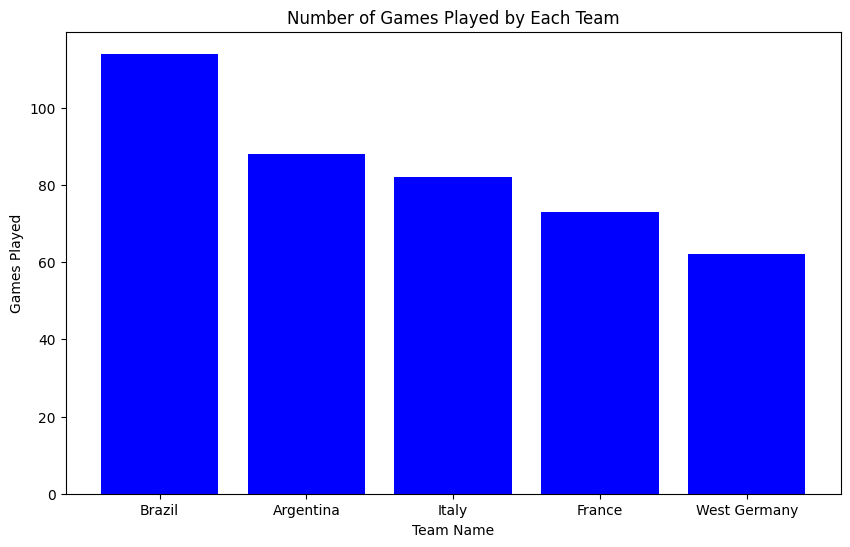

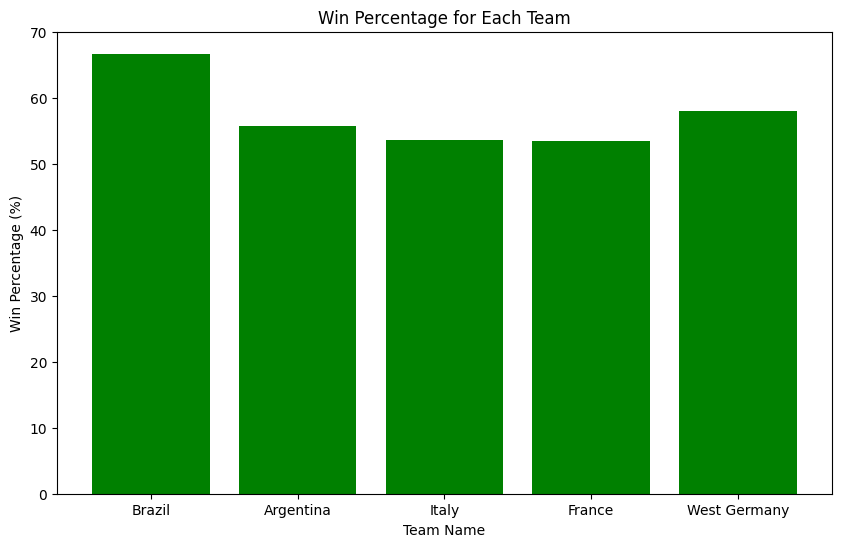

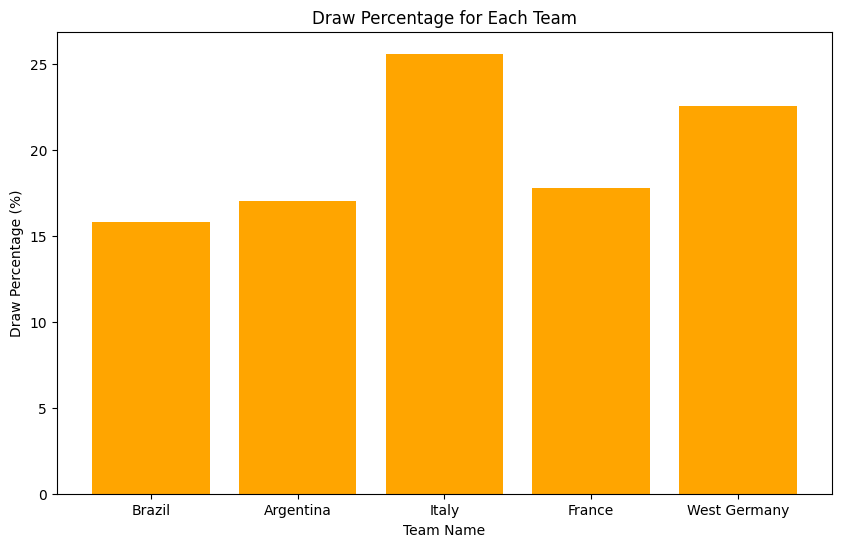

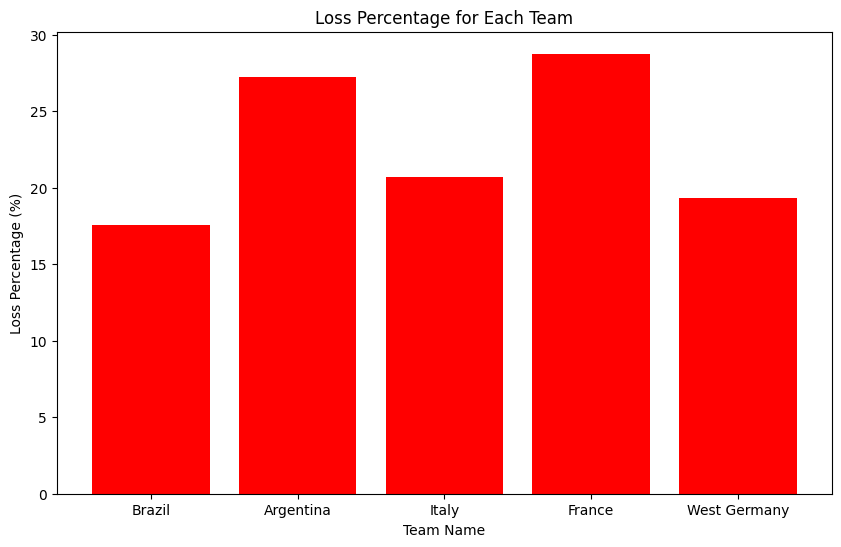

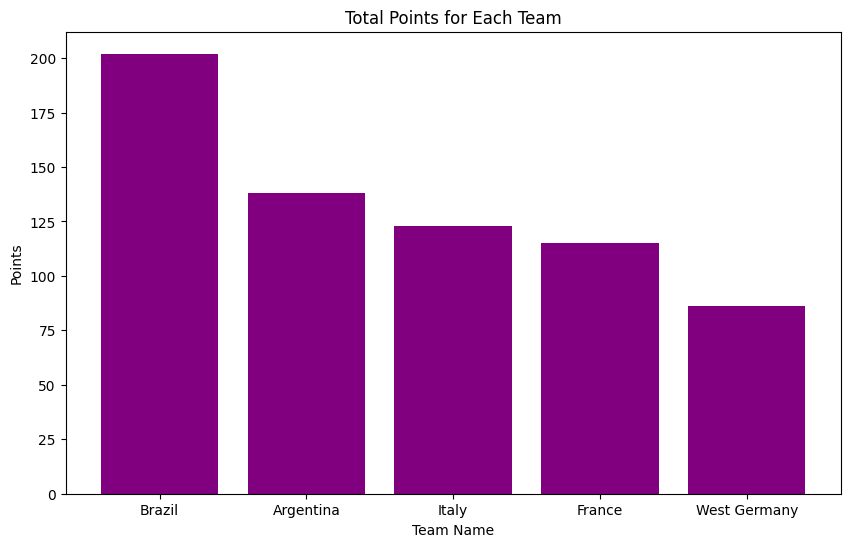

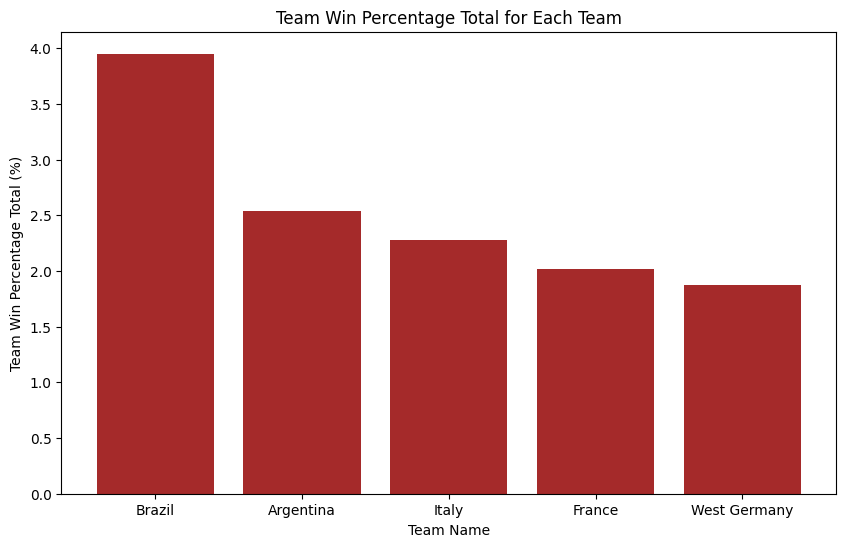

In [130]:
# Bar chart for Games Played
plt.figure(figsize=(10, 6))
plt.bar(TopFive.index, TopFive['Games Played'], color='blue')
plt.title('Number of Games Played by Each Team')
plt.xlabel('Team Name')
plt.ylabel('Games Played')
plt.show()

# Bar chart for Win Percentage
plt.figure(figsize=(10, 6))
plt.bar(TopFive.index, TopFive['Win Percent'], color='green')
plt.title('Win Percentage for Each Team')
plt.xlabel('Team Name')
plt.ylabel('Win Percentage (%)')
plt.show()

# Bar chart for Draw Percentage
plt.figure(figsize=(10, 6))
plt.bar(TopFive.index, TopFive['Draw Percent'], color='orange')
plt.title('Draw Percentage for Each Team')
plt.xlabel('Team Name')
plt.ylabel('Draw Percentage (%)')
plt.show()

# Bar chart for Loss Percentage
plt.figure(figsize=(10, 6))
plt.bar(TopFive.index, TopFive['Loss Percent'], color='red')
plt.title('Loss Percentage for Each Team')
plt.xlabel('Team Name')
plt.ylabel('Loss Percentage (%)')
plt.show()

# Bar chart for Points
plt.figure(figsize=(10, 6))
plt.bar(TopFive.index, TopFive['Points'], color='purple')
plt.title('Total Points for Each Team')
plt.xlabel('Team Name')
plt.ylabel('Points')
plt.show()

# Bar chart for Team Win Percentage Total
plt.figure(figsize=(10, 6))
plt.bar(TopFive.index, TopFive['Team Win Percent Total'], color='brown')
plt.title('Team Win Percentage Total for Each Team')
plt.xlabel('Team Name')
plt.ylabel('Team Win Percentage Total (%)')
plt.show()
